<a href="https://colab.research.google.com/github/shirlwilliams/mod4-image-classification/blob/master/pneumonia_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with Deep Learning - Pneumonia
Module 4 Project

Objective: Given a chest x-ray image of pediatric patients, build a model that can classify whether a given patient has pneumonia.

Goal: Build a deep neural network trained on a large dataset for classification on a non-trivial task.

# The Data
Imports and the dataset from Kaggle.

In [1]:
# Necessary libraries and classes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras import initializers
from keras import layers
from keras import regularizers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, MaxPooling2D, Dropout
from keras import optimizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# Uploading the Data
First connect to Google Drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Upload images, reshape, and create labels
In the interest of time I switched the train and test sets. The test set was relatively balanced and the train set was horribly imbalanced.

In [3]:
# Directory path
train_data_dir = '/content/gdrive/My Drive/Datasets/chest_xray/train'
test_data_dir = '/content/gdrive/My Drive/Datasets/chest_xray/test'

# Get all the data the pneumonia train directory (1218 images), and reshape them
train_generator = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    ).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size=1218,
        class_mode='binary',
        shuffle=True,
        seed=42)

# Get all the data in the test directory (624 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), 
        batch_size=624,
        class_mode='binary',
        shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)



Found 1218 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
train_images.shape

(1218, 64, 64, 3)

### Investigate the number of images
The number of normal and pneumonia images fro each type in train and test folders show a significant imbalance in the train data. The normal train values only represent 6.89% of the overall train data.


In [5]:
normal_train = glob.glob('/content/gdrive/My Drive/Datasets/chest_xray/train/NORMAL/*.jpeg')
pneu_train = glob.glob('/content/gdrive/My Drive/Datasets/chest_xray/train/PNEUMONIA/*.jpeg')
normal_test = glob.glob('/content/gdrive/My Drive/Datasets/chest_xray/test/NORMAL/*.jpeg')
pneu_test = glob.glob('/content/gdrive/My Drive/Datasets/chest_xray/test/PNEUMONIA/*.jpeg')

print(len(normal_train), len(pneu_train), len(normal_test), len(pneu_test))

84 1134 234 390


In [6]:
print(len(train_images), len(train_labels), len(test_images), len(test_labels))

1218 1218 624 624


In [7]:
# Transform each matrix to 2D
train_img_unrow = train_images.reshape(-1, 1218).T
test_img_unrow = test_images.reshape(-1, 624).T

print(np.shape(train_img_unrow))
print(np.shape(test_img_unrow))

(1218, 12288)
(624, 12288)


In [8]:
# Check labels
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

# Creating the Baseline Model
Out of the box, no considerations

In [0]:
# Initialize the classifier
classifier = Sequential()

# Adding the layers
classifier.add(Dense(units = 16, activation='relu', input_dim=12288))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 6, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))

In [0]:
# Compile the function with optimizer and loss
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Create Baseline Model
Use weights to balance classes. Use a neural network.

In [0]:
# Define weights to balance classes
weights = {0:13, 1:1}

In [12]:
# Baseline model (lowered to 15 epochs after initial runs as evidence of overfitting)
model1 = classifier.fit(train_img_unrow, train_labels, batch_size=10, epochs=15)

Epoch 1/15
1218/1218 [==============================] - 1s 857us/step - loss: 10.3543 - accuracy: 0.7011
Epoch 2/15
1218/1218 [==============================] - 1s 591us/step - loss: 0.6195 - accuracy: 0.9310
Epoch 3/15
1218/1218 [==============================] - 1s 595us/step - loss: 0.5761 - accuracy: 0.9310
Epoch 4/15
1218/1218 [==============================] - 1s 595us/step - loss: 0.5350 - accuracy: 0.9310
Epoch 5/15
1218/1218 [==============================] - 1s 597us/step - loss: 0.4984 - accuracy: 0.9310
Epoch 6/15
1218/1218 [==============================] - 1s 600us/step - loss: 0.4655 - accuracy: 0.9310
Epoch 7/15
1218/1218 [==============================] - 1s 591us/step - loss: 0.4352 - accuracy: 0.9310
Epoch 8/15
1218/1218 [==============================] - 1s 579us/step - loss: 0.4083 - accuracy: 0.9310
Epoch 9/15
1218/1218 [==============================] - 1s 615us/step - loss: 0.3841 - accuracy: 0.9310
Epoch 10/15
1218/1218 [==============================] - 1s 583

 ## Results of the Baseline Model

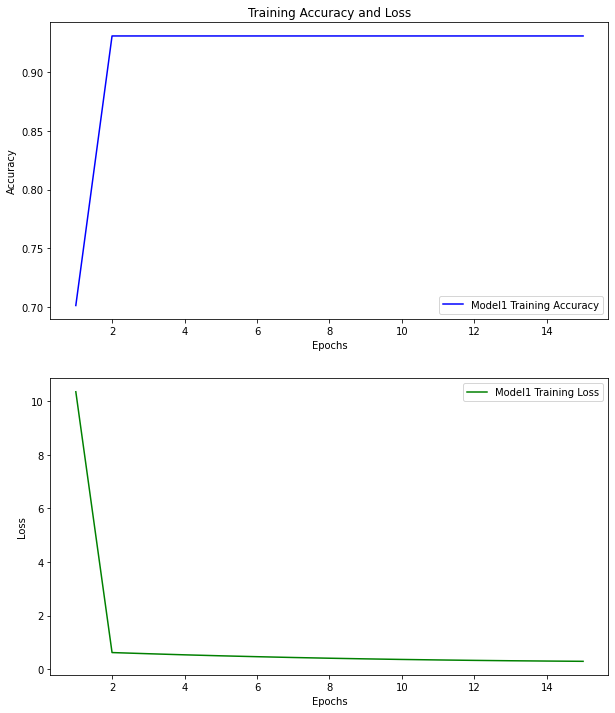

In [13]:
# model1 details
model1_dict = model1.history
model1_acc_values = model1_dict['accuracy'] 
model1_loss_values = model1_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))
# fig1.suptitle('Training and Validation Accuracy')

epochs = range(1, len(model1_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model1_acc_values, 'b', label='Model1 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model1_loss_values, 'g', label='Model1 Training Loss')
# ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Model Metrics

In [16]:
pred_train= classifier.predict(train_img_unrow)
train_scores = classifier.evaluate(train_img_unrow, train_labels, verbose=0)
print('Training Accuracy: {:.2f} \nTraining Error: {:.2f}'.format(train_scores[1], 1 - train_scores[1]))   
 
pred_test= classifier.predict(test_img_unrow)
test_scores = classifier.evaluate(test_img_unrow, test_labels, verbose=0)
print('Test Accuracy: {:.2f} \nTest Error: {:.2f}'.format(test_scores[1], 1 - test_scores[1]))

Training Accuracy: 0.93 
Training Error: 0.07
Test Accuracy: 0.62 
Test Error: 0.38


In [17]:
# Model evaluation of the training as test data
results_train = classifier.evaluate(train_img_unrow, train_labels)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

results_test = classifier.evaluate(test_img_unrow, test_labels)
print('----------')
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

1218/1218 [==============================] - 0s 180us/step
----------
Training Loss: 0.288 
Training Accuracy: 0.931
624/624 [==============================] - 0s 125us/step
----------
Test Loss: 0.798 
Test Accuracy: 0.625


### Confusion Matrix 

In [18]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test))
cm

array([[  0, 234],
       [  0, 390]])

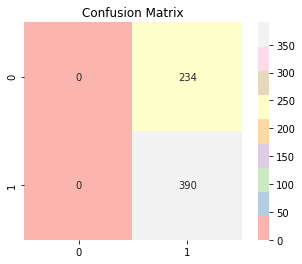

In [19]:
fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

## Baseline Model Summary
The results show how the imbalance of the normal and pneumonia images skew the results creating a worthless mode counting all images as pneumonia. A basic neural network isn't sufficient as a model. 

# Second Model
First adjust layers and batch size.

In [0]:
# New model with addes layers
classifier = Sequential()
classifier.add(Dense(units = 64, activation='relu', input_dim=12288))
classifier.add(Dense(units = 32, activation='relu'))
classifier.add(Dense(units = 16, activation='relu'))
classifier.add(Dense(units = 8, activation='relu'))
classifier.add(Dense(units = 1, activation='sigmoid'))
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# Second model 
model2 = classifier.fit(train_img_unrow, train_labels, class_weight=weights, batch_size=20, epochs=15)

Epoch 1/15
1218/1218 [==============================] - 1s 773us/step - loss: 16.5986 - accuracy: 0.4589
Epoch 2/15
1218/1218 [==============================] - 1s 704us/step - loss: 1.2668 - accuracy: 0.9310
Epoch 3/15
1218/1218 [==============================] - 1s 696us/step - loss: 1.2668 - accuracy: 0.9310
Epoch 4/15
1218/1218 [==============================] - 1s 672us/step - loss: 1.2668 - accuracy: 0.9310
Epoch 5/15
1218/1218 [==============================] - 1s 682us/step - loss: 1.2668 - accuracy: 0.9310
Epoch 6/15
1218/1218 [==============================] - 1s 685us/step - loss: 1.2667 - accuracy: 0.9310
Epoch 7/15
1218/1218 [==============================] - 1s 695us/step - loss: 1.2667 - accuracy: 0.9310
Epoch 8/15
1218/1218 [==============================] - 1s 675us/step - loss: 1.2670 - accuracy: 0.9310
Epoch 9/15
1218/1218 [==============================] - 1s 698us/step - loss: 1.2666 - accuracy: 0.9310
Epoch 10/15
1218/1218 [==============================] - 1s 677

## Results of the 2nd Model

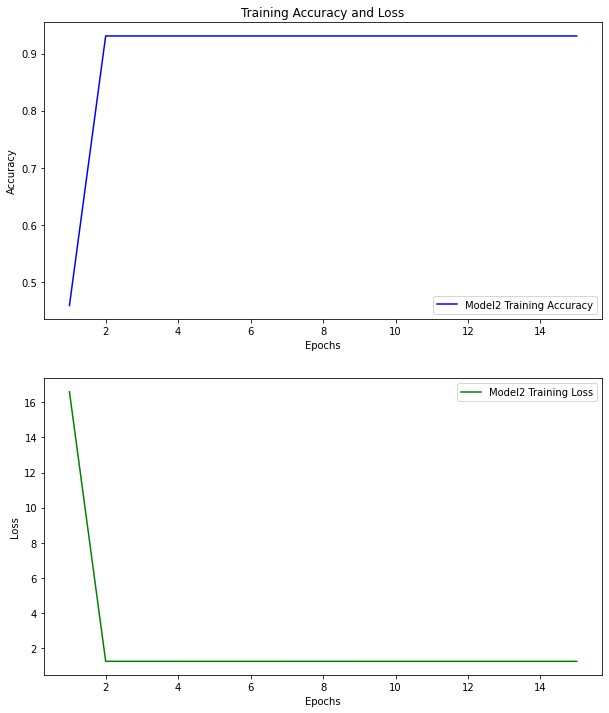

In [30]:
# model1 details
model2_dict = model2.history
model2_acc_values = model2_dict['accuracy'] 
model2_loss_values = model2_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))
# fig1.suptitle('Training and Validation Accuracy')

epochs = range(1, len(model2_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model2_acc_values, 'b', label='Model2 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model2_loss_values, 'g', label='Model2 Training Loss')
# ax[1].set_title('Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Model Metrics

In [31]:
pred_train2= classifier.predict(train_img_unrow)
train_scores2 = classifier.evaluate(train_img_unrow, train_labels, verbose=0)
print('Accuracy on training data: {:.2f} \nError on training data: {:.2f}'.format(train_scores2[1], 1 - train_scores2[1]))   
 
pred_test2= classifier.predict(test_img_unrow)
test_scores2 = classifier.evaluate(test_img_unrow, test_labels, verbose=0)
print('Accuracy on test data: {:.2f} \nError on test data: {:.2f}'.format(test_scores2[1], 1 - test_scores2[1]))

Accuracy on training data: 0.93 
Error on training data: 0.07
Accuracy on test data: 0.62 
Error on test data: 0.38


### Confusion Matrix

[[  0 234]
 [  0 390]]


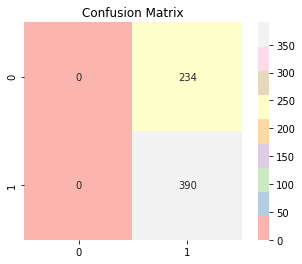

In [32]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

## Second Model Summary
This model further illustrates the how class imbalance prohibits construction of a good model. I should try to use SMOTE for balancing, however, I discovered convolutional neural networks to be far superior in image classification. The remaining models will focus on convolutional neural networks.

# Third Model
Used a Convolutional Neural Network with Conv2D, MaxPooling2D, and Flatten.

In [33]:
# Third model using a CNN
classifier = Sequential([
                         Conv2D(8, kernel_size=(5, 5), activation='relu', padding='same',input_shape=train_images.shape[1:]),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu'),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Flatten(),
                         Dense(16, activation='relu'),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model3 = classifier.fit(train_images, 
                        train_labels, 
                        class_weight=weights,
                        epochs=15, 
                        batch_size=10)

Epoch 1/15
1218/1218 [==============================] - 5s 4ms/step - loss: 5.8741 - accuracy: 0.5213
Epoch 2/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.2675 - accuracy: 0.0714
Epoch 3/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.2701 - accuracy: 0.0805
Epoch 4/15
1218/1218 [==============================] - 5s 4ms/step - loss: 1.2675 - accuracy: 0.0690
Epoch 5/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.2676 - accuracy: 0.0690
Epoch 6/15
1218/1218 [==============================] - 5s 4ms/step - loss: 1.2673 - accuracy: 0.0690
Epoch 7/15
1218/1218 [==============================] - 5s 4ms/step - loss: 1.2672 - accuracy: 0.0690
Epoch 8/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.2672 - accuracy: 0.0690
Epoch 9/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.2670 - accuracy: 0.3448
Epoch 10/15
1218/1218 [==============================] - 4s 4ms/step - loss: 1.267

## Results of third model

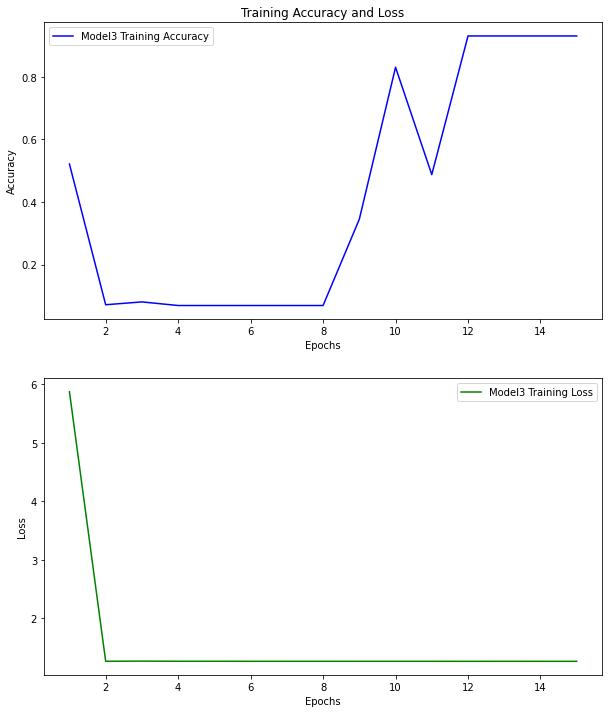

In [34]:
# model details
model3_dict = model3.history
model3_acc_values = model3_dict['accuracy'] 
model3_loss_values = model3_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))

epochs = range(1, len(model3_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model3_acc_values, 'b', label='Model3 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model3_loss_values, 'g', label='Model3 Training Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

In [38]:
pred_train3= classifier.predict(train_images)
train_scores3 = classifier.evaluate(train_images, train_labels, verbose=0)
print('Accuracy on training data: {:.2f} \nError on training data: {:.2f}'.format(train_scores3[1], 1 - train_scores3[1]))   
 
pred_test3= classifier.predict(test_images)
test_scores3 = classifier.evaluate(test_images, test_labels, verbose=0)
print('Accuracy on test data: {:.2f} \nError on test data: {:.2f}'.format(test_scores3[1], 1 - test_scores3[1]))


Accuracy on training data: 0.93 
Error on training data: 0.07
Accuracy on test data: 0.62 
Error on test data: 0.38


[[  0 234]
 [  0 390]]


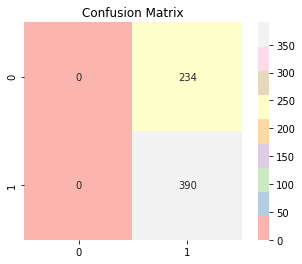

In [39]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test3))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

## Third Model Summary
This model has the same issues.

# Fourth Model
Try another CNN model with different values.

In [0]:
print(train_images.shape, train_labels.shape)

(624, 64, 64, 3) (624,)


In [0]:
# Use of CNN
classifier = Sequential([
                         Conv2D(8, kernel_size=(4, 4), activation='relu', padding='same',input_shape=train_images.shape[1:]),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu'),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Flatten(),
                         Dense(16, activation='relu'),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model4 = classifier.fit(train_images, 
                        train_labels, 
                        class_weight=weights,
                        epochs=15, 
                        batch_size=8)

Epoch 1/15
1218/1218 [==============================] - 4s 3ms/step - loss: 1.1362 - accuracy: 0.7471
Epoch 2/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.4848 - accuracy: 0.8966
Epoch 3/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.2752 - accuracy: 0.9450
Epoch 4/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.1670 - accuracy: 0.9672
Epoch 5/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0828 - accuracy: 0.9828
Epoch 6/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0753 - accuracy: 0.9819
Epoch 7/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0697 - accuracy: 0.9844
Epoch 8/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.0391 - accuracy: 0.9918
Epoch 9/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.2948 - accuracy: 0.9507
Epoch 10/15
1218/1218 [==============================] - 4s 3ms/step - loss: 0.559

## Results of Fourth Model

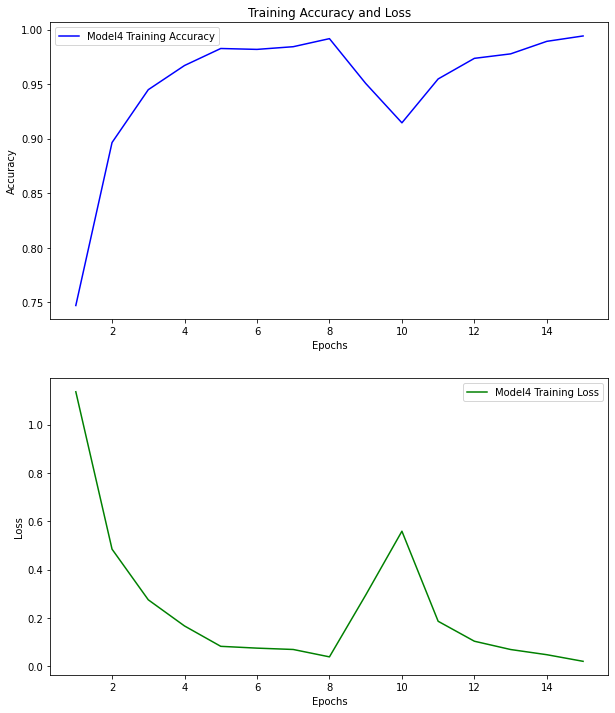

In [0]:
# model details
model4_dict = model4.history
model4_acc_values = model4_dict['accuracy'] 
model4_loss_values = model4_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))

epochs = range(1, len(model4_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model4_acc_values, 'b', label='Model4 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model4_loss_values, 'g', label='Model4 Training Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Model Metrics

In [0]:
pred_train4= classifier.predict(train_images)
train_scores4 = classifier.evaluate(train_images, train_labels, verbose=0)
print('Accuracy on training data: \t{:.2f} \nError on training data: \t{:.2f}'.format(train_scores4[1], 1 - train_scores4[1]))   
print()
pred_test4= classifier.predict(test_images)
test_scores4 = classifier.evaluate(test_images, test_labels, verbose=0)
print('Accuracy on test data: \t\t{:.2f} \nError on test data: \t\t{:.2f}'.format(test_scores4[1], 1 - test_scores4[1]))


Accuracy on training data: 	0.96 
Error on training data: 	0.04

Accuracy on test data: 		0.74 
Error on test data: 		0.26


In [0]:
# test predictions
test_preds = classifier.predict_classes(test_images)
# convert to a 1D array
test_preds = test_preds[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, test_preds)
print('Accuracy: \t%.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, test_preds)
print('Precision: \t%.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, test_preds)
print('Recall: \t%.2f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, test_preds)
print('F1 score: \t%.2f' % f1)


Accuracy: 	0.74
Precision: 	0.71
Recall: 	0.98
F1 score: 	0.83


[[ 81 153]
 [  8 382]]


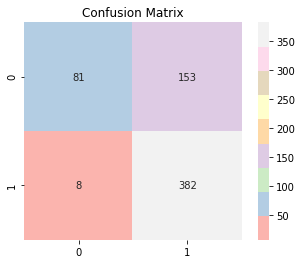

In [0]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test4))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

### Fourth Model Summary
Voila - what a nice model

# Fifth Model
I will apply dropout to certain layers of the CNN.

In [0]:
# Use of CNN
classifier = Sequential([
                         Conv2D(8, kernel_size=(4, 4), activation='relu', padding='same',input_shape=train_images.shape[1:]),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu'),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Dropout(0.3),
                         Flatten(),
                         Dense(16, activation='relu'),
                         Dropout(0.3),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model5 = classifier.fit(train_images,
                        train_labels, 
                        class_weight=weights,
                        epochs=50,
                        batch_size=10)

Epoch 1/50
1218/1218 [==============================] - 4s 3ms/step - loss: 8.4173 - accuracy: 0.5764
Epoch 2/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.3086 - accuracy: 0.5854
Epoch 3/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.3819 - accuracy: 0.5107
Epoch 4/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.1862 - accuracy: 0.6905
Epoch 5/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.9566 - accuracy: 0.7085
Epoch 6/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.8386 - accuracy: 0.8383
Epoch 7/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.6782 - accuracy: 0.8342
Epoch 8/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.7008 - accuracy: 0.8834
Epoch 9/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.6636 - accuracy: 0.8580
Epoch 10/50
1218/1218 [==============================] - 4s 3ms/step - loss: 0.749

## Results of Fifth Model

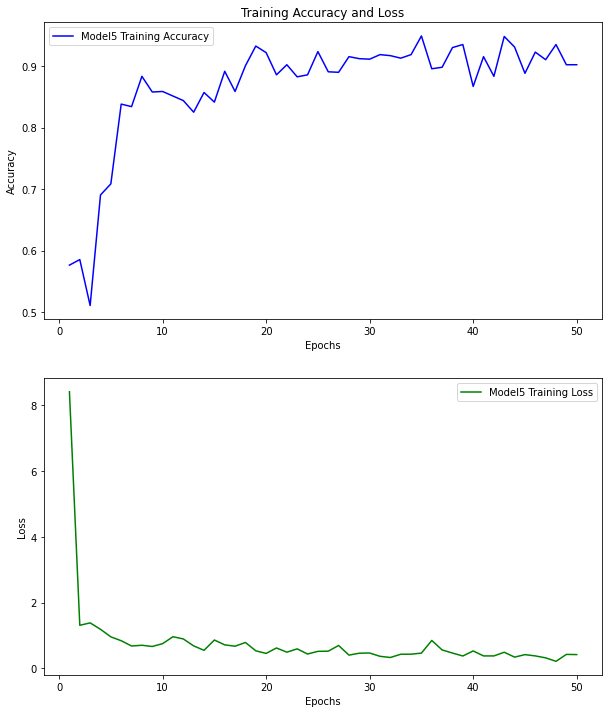

In [0]:
# model details
model5_dict = model5.history
model5_acc_values = model5_dict['accuracy'] 
model5_loss_values = model5_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))

epochs = range(1, len(model5_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model5_acc_values, 'b', label='Model5 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model5_loss_values, 'g', label='Model5 Training Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Test Metrics

In [0]:
# Accuracy and Error on Train and Test Images
pred_train5= classifier.predict(train_images)
train_scores5 = classifier.evaluate(train_images, train_labels, verbose=0)
print('Accuracy on training data: \t{:.2f} \nError on training data: \t{:.2f}'.format(train_scores5[1], 1 - train_scores5[1]))   

pred_test5= classifier.predict(test_images)
test_scores5 = classifier.evaluate(test_images, test_labels, verbose=0)
print('Accuracy on test data: \t\t{:.2f} \nError on test data: \t\t{:.2f}'.format(test_scores5[1], 1 - test_scores5[1]))

Accuracy on training data: 	0.94 
Error on training data: 	0.06
Accuracy on test data: 		0.79 
Error on test data: 		0.21


[[123 111]
 [ 21 369]]


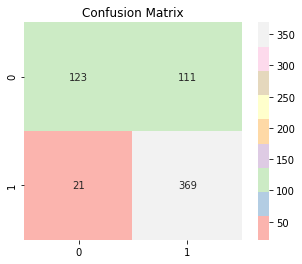

In [0]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test5))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

# Sixth Model
Will try regulizer L1.

In [0]:
# Use of CNN with L1 added
classifier = Sequential([
                         Conv2D(8, kernel_size=(4, 4), activation='relu', 
                                padding='same',input_shape=train_images.shape[1:],
                                kernel_regularizer=regularizers.l1(0.005)),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l1(0.005)),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Dropout(0.3),
                         Flatten(),
                         Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
                         Dropout(0.3),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model6 = classifier.fit(train_images,
                        train_labels, 
                        class_weight=weights,
                        epochs=50,
                        batch_size=10)

Epoch 1/50
1218/1218 [==============================] - 4s 3ms/step - loss: 13.3039 - accuracy: 0.6806
Epoch 2/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.9337 - accuracy: 0.3465
Epoch 3/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.8051 - accuracy: 0.2422
Epoch 4/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.6875 - accuracy: 0.2094
Epoch 5/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.9025 - accuracy: 0.2750
Epoch 6/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.6056 - accuracy: 0.1544
Epoch 7/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.4994 - accuracy: 0.1716
Epoch 8/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.4175 - accuracy: 0.5312
Epoch 9/50
1218/1218 [==============================] - 4s 3ms/step - loss: 3.6886 - accuracy: 0.6568
Epoch 10/50
1218/1218 [==============================] - 4s 3ms/step - loss: 2.48

## Results of Sixth Model

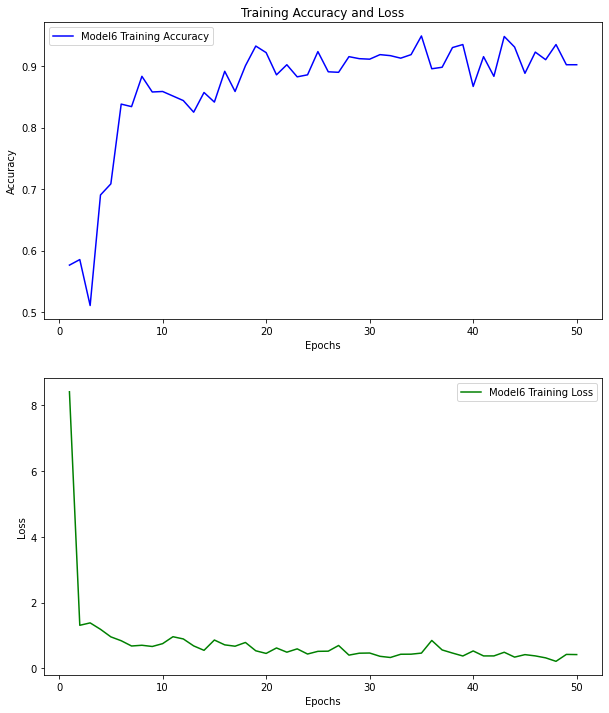

In [0]:
# model details
model6_dict = model5.history
model6_acc_values = model5_dict['accuracy'] 
model6_loss_values = model5_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))

epochs = range(1, len(model6_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model6_acc_values, 'b', label='Model6 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model6_loss_values, 'g', label='Model6 Training Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Model Metrics

In [0]:
# Accuracy and Error on Train and Test Images
pred_train6= classifier.predict(train_images)
train_scores6 = classifier.evaluate(train_images, train_labels, verbose=0)
print('Accuracy on training data: \t{:.2f} \nError on training data: \t{:.2f}'.format(train_scores6[1], 1 - train_scores6[1]))   

pred_test6= classifier.predict(test_images)
test_scores6 = classifier.evaluate(test_images, test_labels, verbose=0)
print('Accuracy on test data: \t\t{:.2f} \nError on test data: \t\t{:.2f}'.format(test_scores6[1], 1 - test_scores6[1]))

Accuracy on training data: 	0.89 
Error on training data: 	0.11
Accuracy on test data: 		0.71 
Error on test data: 		0.29


In [0]:
# test predictions
test_preds = classifier.predict_classes(test_images)
# convert to a 1D array
test_preds = test_preds[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, test_preds)
print('Accuracy: \t%.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, test_preds)
print('Precision: \t%.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, test_preds)
print('Recall: \t%.2f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, test_preds)
print('F1 score: \t%.2f' % f1)

Accuracy: 	0.71
Precision: 	0.70
Recall: 	0.95
F1 score: 	0.80


[[ 72 162]
 [ 20 370]]


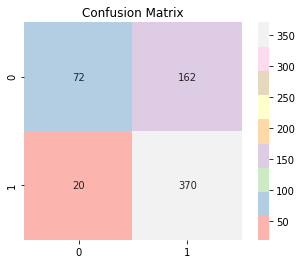

In [0]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test6))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

# Seventh Model
Added L2 Regularization

In [0]:
# Use of CNN with L2 added
classifier = Sequential([
                         Conv2D(8, kernel_size=(4, 4), activation='relu', 
                                padding='same',input_shape=train_images.shape[1:],
                                kernel_regularizer=regularizers.l2(0.01)),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Conv2D(4, kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                         MaxPooling2D(pool_size=(2, 2),strides=2),
                         Dropout(0.3),
                         Flatten(),
                         Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                         Dropout(0.3),
                         Dense(8, activation='relu'),
                         Dense(1, activation='sigmoid')
                         ])
# Compile the model
classifier.compile(optimizer='adam', 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

# Train the model
model7 = classifier.fit(train_images,
                        train_labels, 
                        class_weight=weights,
                        epochs=50,
                        batch_size=10)

Epoch 1/50
1218/1218 [==============================] - 4s 3ms/step - loss: 10.5329 - accuracy: 0.6018
Epoch 2/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.8640 - accuracy: 0.6626
Epoch 3/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.7342 - accuracy: 0.6478
Epoch 4/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.5753 - accuracy: 0.6782
Epoch 5/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.4164 - accuracy: 0.7077
Epoch 6/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.5193 - accuracy: 0.7709
Epoch 7/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.3626 - accuracy: 0.8489
Epoch 8/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.3771 - accuracy: 0.8177
Epoch 9/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.2760 - accuracy: 0.7898
Epoch 10/50
1218/1218 [==============================] - 4s 3ms/step - loss: 1.27

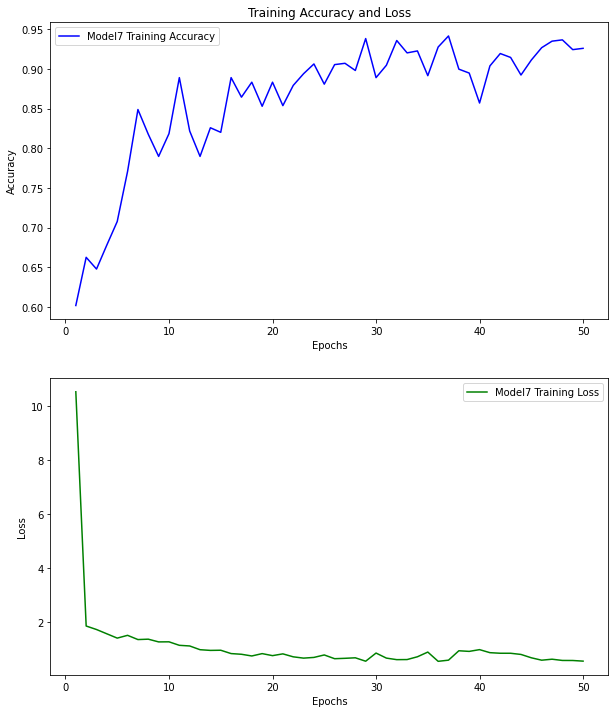

In [0]:
# model details
model7_dict = model7.history
model7_acc_values = model7_dict['accuracy'] 
model7_loss_values = model7_dict['loss']

# Plot the accuracy and loss for these models
fig1, ax = plt.subplots(2, figsize=(10, 12))

epochs = range(1, len(model7_acc_values) + 1)

# Training Accuracy
ax[0].plot(epochs, model7_acc_values, 'b', label='Model7 Training Accuracy')
ax[0].set_title('Training Accuracy and Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend();

# Training Loss
ax[1].plot(epochs, model7_loss_values, 'g', label='Model7 Training Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend();
plt.show()

### Test Metrics

In [0]:
# Accuracy and Error on Train and Test Images
pred_train7= classifier.predict(train_images)
train_scores7 = classifier.evaluate(train_images, train_labels, verbose=0)
print('Accuracy on training data: \t{:.2f} \nError on training data: \t{:.2f}'.format(train_scores7[1], 1 - train_scores7[1]))   

pred_test7= classifier.predict(test_images)
test_scores7 = classifier.evaluate(test_images, test_labels, verbose=0)
print('Accuracy on test data: \t\t{:.2f} \nError on test data: \t\t{:.2f}'.format(test_scores7[1], 1 - test_scores7[1]))

Accuracy on training data: 	0.95 
Error on training data: 	0.05
Accuracy on test data: 		0.77 
Error on test data: 		0.23


In [0]:
# test predictions
test_preds7 = classifier.predict_classes(test_images)
# convert to a 1D array
test_preds7 = test_preds7[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, test_preds7)
print('Accuracy: \t%.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, test_preds7)
print('Precision: \t%.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, test_preds7)
print('Recall: \t%.2f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, test_preds7)
print('F1 score: \t%.2f' % f1)

Accuracy: 	0.77
Precision: 	0.77
Recall: 	0.91
F1 score: 	0.83


[[130 104]
 [ 37 353]]


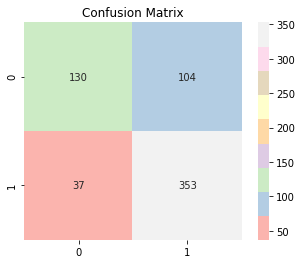

In [0]:
# Confusion Matrix
cm = confusion_matrix(test_labels, np.round(pred_test7))
print(cm)

fig_cmb = sns.heatmap(cm, cmap='Pastel1', annot=True, fmt='d', square=True)
plt.autoscale
plt.title('Confusion Matrix')
plt.show();

## Seventh Model Summary

# Conclusion
Of the models found Model 5 tends to have the higher group of scores; higher accuracy, precision, f1 and more importantly the higher recall.

* Convolution neural networks are most useful classifying images over regular neural networks
Dropout is a preferable regularization technique to avoid overfitting in deep neural networks.
* L1 (Lasso Regression) regularization adds a “squared magnitude” of the coefficient as a penalty term to the loss function.
* L2 (Ridge Regression) regularization adds an "absolute value of magnitude" of the coefficient as a penalty term to the loss function.
* Google colab aids time on task - so much faster
## Future options
* Add cross-validation and possibly a grid search to tune arguments.
* Find a dataset with more balanced data or add to the normal x-ray training dataset.
* Continue to tune parameters/hyperparameters.